<a href="https://colab.research.google.com/github/Niteesh57/Demo_git/blob/main/18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df  = pd.read_csv("/content/train.csv",encoding='latin-1')

In [45]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [46]:
#No-null values in the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            1054 non-null   object 
 1   text              1053 non-null   object 
 2   selected_text     1053 non-null   object 
 3   sentiment         1054 non-null   object 
 4   Time of Tweet     1054 non-null   object 
 5   Age of User       1054 non-null   object 
 6   Country           1054 non-null   object 
 7   Population -2020  1054 non-null   int64  
 8   Land Area (Km²)   1054 non-null   float64
 9   Density (P/Km²)   1054 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 82.5+ KB


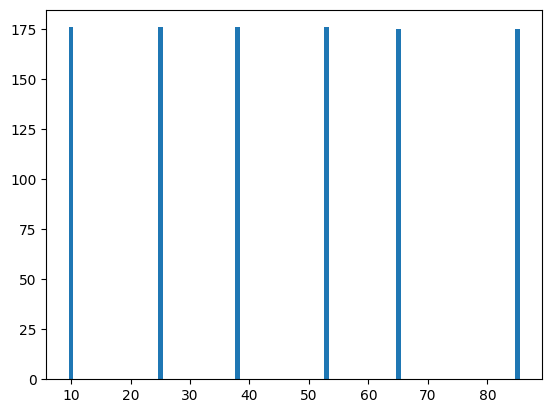

In [47]:
from collections import Counter
import matplotlib.pyplot as plt

# Define a function to convert the string ranges to integer averages
def convert_range_to_average(range_str):
    if isinstance(range_str, str):  # Check if it's a string
        # Split the range string by '-'
        parts = range_str.split('-')

        # Convert the parts to integers
        lower = int(parts[0])
        upper = int(parts[1])

        # Calculate the average
        average = (lower + upper) // 2

        return average
    else:
        return range_str  # Return the original value if it's not a string

data21 = []
for i in df["Age of User"]:
    average1 = convert_range_to_average(i)
    data21.append(average1)

pic1 = Counter(data21)
x_values = list(pic1.keys())
y_values = list(pic1.values())

# Create a bar chart
plt.bar(x_values, y_values)
plt.show()


In [48]:
data24 = df["Country"].unique().tolist()
print(data24,end = " ")

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Congo-Brazzaville)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia (Czech Republic)', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (fmr. "Swaziland")', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',

In [49]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
new_sent = ''
for token in df['text'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'what better way to spoil mum than to let her kick back and relax over a nice meal and a bottle of her favorite wine? our wine wa a red '

In [51]:
pip install contractions


In [52]:
import re
import contractions
contractions.fix(df['text'][24])

'SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cALLed LoSe f0LloWeRs FridAy... smH'

In [53]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [54]:
cleaned_tweets = []  # list of cleaned tweets
for twt in df['text']:
    if isinstance(twt, str):
        cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))


In [55]:
# Ensure the lengths match by either dropping or adding a row
if len(df) == len(cleaned_tweets):
    df['new_text'] = cleaned_tweets
else:
    # Handle the mismatch by either dropping or adding a row
    # For example, you can drop the last row from the DataFrame
    df = df.iloc[:-1]
    df['new_text'] = cleaned_tweets
df.head()

<ipython-input-55-ce6e41296451>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_text'] = cleaned_tweets


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),new_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,i d have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,my bos is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,son of why couldn t they put them on the relea...


In [56]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [58]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already loaded your DataFrame 'df'

# Initialize the Porter Stemmer and the list 'corpus'
ps = PorterStemmer()
corpus = []

# Preprocess the text data and populate the 'corpus' list
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z0-9]', ' ', str(df["text"][i]))  # Remove special characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Tokenize the text

    # Remove stopwords and apply stemming
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Initialize and fit the TF-IDF vectorizer
tv = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))
X = tv.fit_transform(corpus).toarray()
y = np.array(df['sentiment'])


In [59]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
rs = RandomOverSampler()

# Apply random oversampling to X and y
X_resampled, y_resampled = rs.fit_resample(X, y)

# Specify the desired size of the reduced dataset
desired_size = 10  # Adjust this value as needed

if X_resampled.shape[0] > desired_size:
    # Randomly select a subset of the oversampled data
    indices = np.random.choice(X_resampled.shape[0], desired_size, replace=False)
    X_reduced = X_resampled[indices]
    y_reduced = y_resampled[indices]
else:
    # If the desired size is greater than or equal to the current size, keep the oversampled data as is
    X_reduced = X_resampled
    y_reduced = y_resampled

# Check the shape of the reduced dataset
print("Reduced X shape:", X_reduced.shape)
print("Reduced y shape:", y_reduced.shape)


Reduced X shape: (10, 2500)
Reduced y shape: (10,)


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=5, random_state=5)

In [76]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [77]:
predict = svc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy of Support vector machine',accuracy_score(y_test,predict)*100)

Accuracy of Support vector machine 60.0


In [78]:
from sklearn.metrics import confusion_matrix
print('Confusuion matrix of Support vector machine\n',confusion_matrix(y_test,predict))

Confusuion matrix of Support vector machine
 [[1 0]
 [2 2]]


In [79]:
from sklearn.metrics import classification_report
print('Classification report of Support vector machine \n\n',classification_report(y_test,predict))

Classification report of Support vector machine 

               precision    recall  f1-score   support

     neutral       0.33      1.00      0.50         1
    positive       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5

